Flatten()은 1줄로 만들어서 Nueral Network에 1차원으로 데이터를 넣을 수 있게끔 하는데, 이러한 과정을 거치게 되면, 입력 데이터의 형상이 무너지는 부작용이 있다. 이는 단점으로써 작용할 수 있다.

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
K.image_data_format()

'channels_last'

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
print(x_train.shape)

(60000, 28, 28)


In [5]:
print(x_test.shape)

(10000, 28, 28)


##Reshape for CNN

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
print(x_train.shape)

(60000, 28, 28, 1)


In [7]:
x_test = x_test.reshape(-1, 28, 28, 1)
print(x_test.shape)

(10000, 28, 28, 1)


In [0]:
input_shape1 = (28, 28, 1)

##Hyper parameters

In [0]:
nb_epoch = 5
num_classes = 10
batch_size = 128

##Model definition

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape1))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25)) # 중간 레이어에서 조정하는 과정.
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

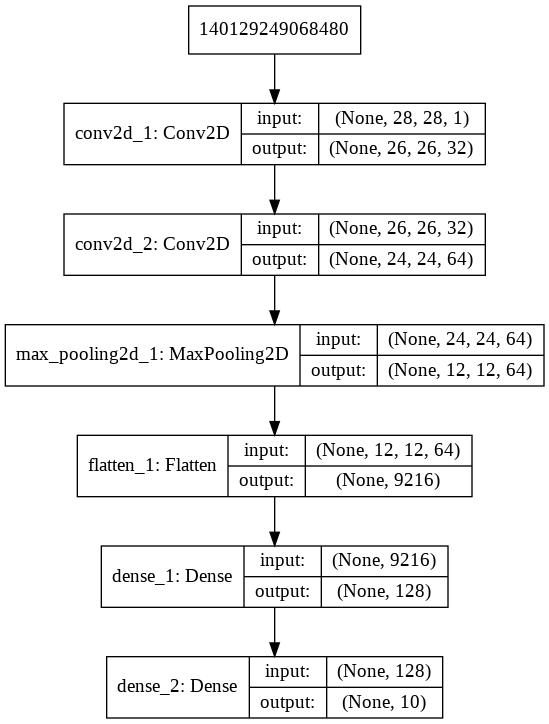

In [14]:
from keras.utils import plot_model
plot_model(model, to_file='modelCNN.png', show_shapes=True)
from IPython.display import Image
Image("modelCNN.png")

In [15]:
model.fit(x_train, y_train, epochs=nb_epoch)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 178s 3ms/step - loss: 0.1112 - acc: 0.9655
Epoch 2/5
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0371 - acc: 0.9888
Epoch 3/5
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0224 - acc: 0.9928
Epoch 4/5
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0158 - acc: 0.9949
Epoch 5/5
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0127 - acc: 0.9954


##*Real World Challenge*: Difference between training and testing set accuracy

####Test accuracy

In [16]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 8s 754us/step


In [17]:
score

[0.039154979102405923, 0.9896]

In [18]:
print('Test loss:{}'.format(score[0]))
print('Test accuracy:{}'.format(score[1]))

Test loss:0.039154979102405923
Test accuracy:0.9896


####Training accuracy

In [19]:
score = model.evaluate(x_train, y_train)

60000/60000 [==============================] - 44s 734us/step


In [20]:
print('Training loss:{}'.format(score[0]))
print('Training accuracy:{}'.format(score[1]))

Training loss:0.007022159157026423
Training accuracy:0.9978


####Q.What is the difference between the training and test accuracy?

A.Model은 Training set을 통해서 학습을 진행하고 validation set을 통해서 자체 검증을 하는 절차가 없을 시 평가결과에선 굉장히 높은 적중률을 보여주지만 Test set을 통해서 평가를 진행하게 되면 학습시 보지 못했던 데이터이기 때문에 Training set보다 낮은 적중률을 보여주게 됩니다. 이 둘의 차이점은 기계가 봐왔던 데이터로 학습을 한건지 못 보던 데이터로 학습을 한 건지의 차이입니다.